In [1]:
from IPython.display import display, Math
import matplotlib.pyplot as plt
from collections import Counter
from math import *
import filecmp

def get_entropy(file_path : str):
    with open(file_path, "rb") as file:
        data = file.read()
    N = len(data)
    ns = Counter(data)
    H_byte = -sum((n/N)*log2(n/N) for n in ns.values())
    H_total = N*H_byte
    return N, H_byte, H_total

def handle(file_path : str):
    N, H_byte, H_total = get_entropy(file_path)
    display(Math(r"H_{\text{byte}} = %.2f \text{ бит}" % H_byte))
    display(Math(r"H_{\text{total}} = %.2f \text{ бит}" % H_total))
    display(Math(r"\text{Размер файла: } %d \text{ бит}" % (N*8)))

def draw_distribution(file_path : str):
    with open(file_path, "rb") as file:
        data = file.read()
    N = len(data)
    counts = [0 for _ in range(256)]
    for byte in data:
        counts[byte] += 1
    plt.bar(range(256), counts, width=1.0, edgecolor="black")
    plt.title(f"Распределение байтов в файле: {file_path}")
    plt.xlabel("Значение байта (0–255)")
    plt.ylabel("Количество вхождений")
    plt.show()

def show_bit_distribution(file_path: str):
    zeros = 0
    ones = 0
    with open(file_path, "rb") as f:
        data = f.read()
    for byte in data:
        ones_in_byte = bin(byte).count("1")
        ones += ones_in_byte
        zeros += 8 - ones_in_byte
    print(file_path + ":")
    print(f"    Количество 0: {zeros}")
    print(f"    Количество 1: {ones}")

Работа посвящена реализации Lz77(устранение повторов) и кодированию Хаффмана(устранение неравномерности).

Сожмём и разожмём картинку улитки из прошлой работы с помощью алгоритма Хаффмана /tools/Huffman

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

content/snail.bmp:
    Количество 0: 173962
    Количество 1: 1399366


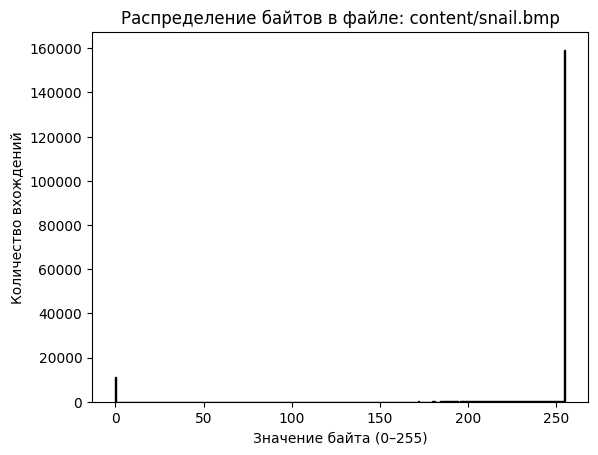

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

content/snail.huff:
    Количество 0: 148226
    Количество 1: 280838


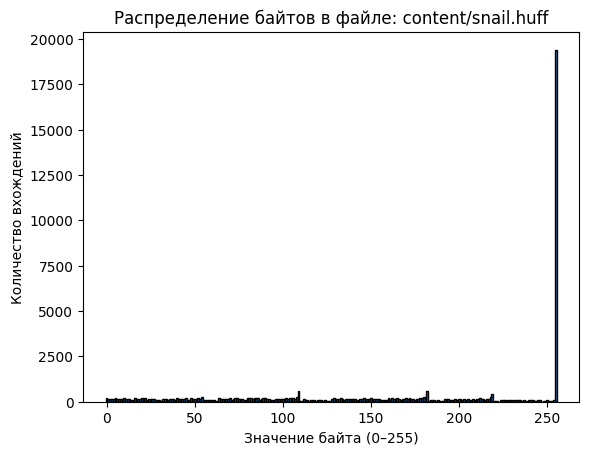

Файлы совпадают!


In [2]:
import tools.Huffman as Huffman

Huffman.encode_file("content/snail.bmp", "content/snail.huff")
Huffman.decode_file("content/snail.huff", "content/snail.huff.bmp")

display(Math(r"\Large \text{До сжатия}"))
handle("content/snail.bmp")
show_bit_distribution("content/snail.bmp")
draw_distribution("content/snail.bmp")
display(Math(r"\Large \text{После сжатия}"))
handle("content/snail.huff")
show_bit_distribution("content/snail.huff")
draw_distribution("content/snail.huff")

print("Файлы", "\b" if filecmp.cmp("content/snail.bmp", "content/snail.huff.bmp", shallow=False) else "не", "совпадают!")

Теперь посмотрим на текстовый файл близкого размера /content/Sample_200kb.txt

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

content/Sample_200kb.txt:
    Количество 0: 872329
    Количество 1: 760615


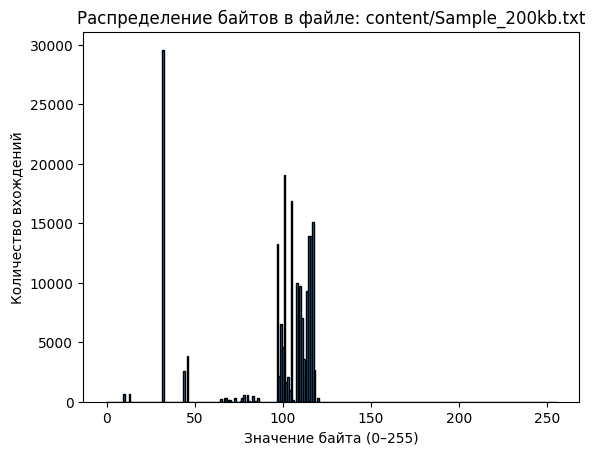

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

content/Sample_200kb.huff:
    Количество 0: 404599
    Количество 1: 472657


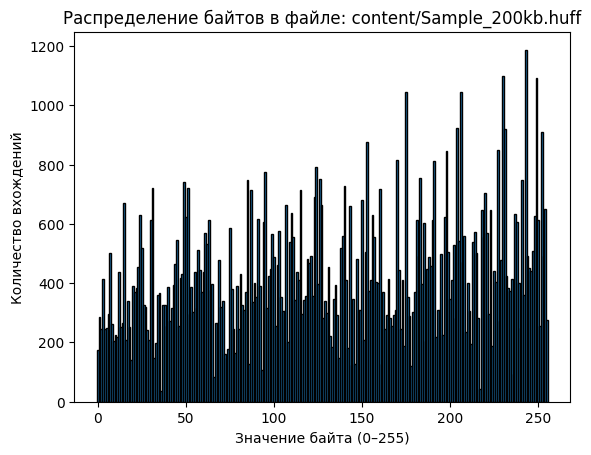

Файлы совпадают!


In [3]:
Huffman.encode_file("content/Sample_200kb.txt", "content/Sample_200kb.huff")
Huffman.decode_file("content/Sample_200kb.huff", "content/Sample_200kb.huff.txt")

display(Math(r"\Large \text{До сжатия}"))
handle("content/Sample_200kb.txt")
show_bit_distribution("content/Sample_200kb.txt")
draw_distribution("content/Sample_200kb.txt")
display(Math(r"\Large \text{После сжатия}"))
handle("content/Sample_200kb.huff")
show_bit_distribution("content/Sample_200kb.huff")
draw_distribution("content/Sample_200kb.huff")

print("Файлы", "\b" if filecmp.cmp("content/snail.bmp", "content/snail.huff.bmp", shallow=False) else "не", "совпадают!")

Попробуем алгоритм Зива-Лемпеля /tools/LZ77

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

content/snail.lz77:
    Количество 0: 329208
    Количество 1: 181288


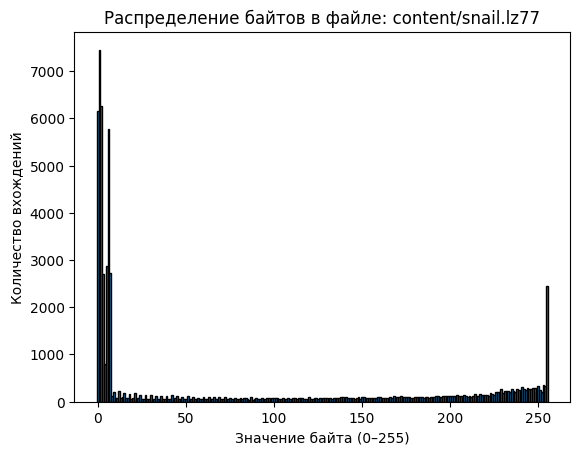

Файлы совпадают!


In [4]:
import tools.LZ77 as LZ77

LZ77.encode_file("content/snail.bmp", "content/snail.lz77")
LZ77.decode_file("content/snail.lz77", "content/snail.lz77.bmp")

display(Math(r"\Large \text{Улитка после сжатия}"))
handle("content/snail.lz77")
show_bit_distribution("content/snail.lz77")
draw_distribution("content/snail.lz77")

print("Файлы", "\b" if filecmp.cmp("content/snail.bmp", "content/snail.lz77.bmp", shallow=False) else "не", "совпадают!")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

content/Sample_200kb.lz77:
    Количество 0: 679934
    Количество 1: 391874


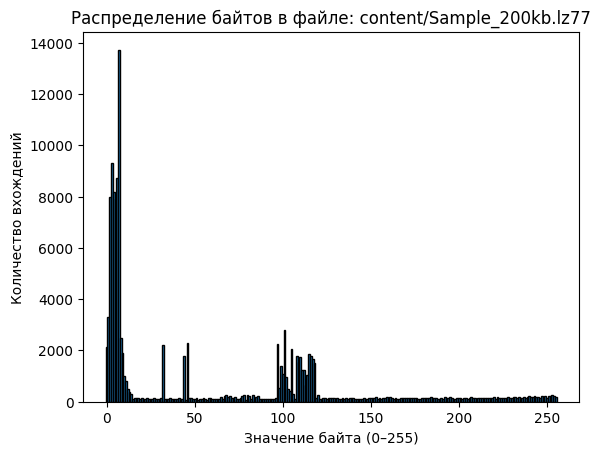

Файлы совпадают!


In [6]:
LZ77.encode_file("content/Sample_200kb.txt", "content/Sample_200kb.lz77")
LZ77.decode_file("content/Sample_200kb.lz77", "content/Sample_200kb.lz77.txt")

display(Math(r"\Large \text{Текст после сжатия}"))
handle("content/Sample_200kb.lz77")
show_bit_distribution("content/Sample_200kb.lz77")
draw_distribution("content/Sample_200kb.lz77")

print("Файлы", "\b" if filecmp.cmp("content/Sample_200kb.txt", "content/Sample_200kb.lz77.txt", shallow=False) else "не", "совпадают!")

Попробуем применить двухступенчатое сжатие

In [16]:
LZ77.encode_file("content/Sample_200kb.huff", "content/Sample_200kb.huff.lz77")
display(Math(r"\Large \text{Sample 200kb Хаффман + lz77}"))
handle("content/Sample_200kb.huff.lz77")
Huffman.encode_file("content/Sample_200kb.lz77", "content/Sample_200kb.lz77.huff")
display(Math(r"\Large \text{Sample 200kb lz77 + Хаффман}"))
handle("content/Sample_200kb.lz77.huff")
LZ77.encode_file("content/snail.huff", "content/snail.huff.lz77")
display(Math(r"\Large \text{Улитка Хаффман + lz77}"))
handle("content/snail.huff.lz77")
Huffman.encode_file("content/snail.lz77", "content/snail.lz77.huff")
display(Math(r"\Large \text{Улитка lz77 + Хаффман}"))
handle("content/snail.lz77.huff")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Вывод:

1) Максимизация энтропии не единственный способ сжать файл, замена повторов "ссылками" тоже существенно уменьшает размер.

2) Если сначала применить коды Хаффмана, а лишь затем LZ77, то второму будет сложно искать повторы и мы добъёмся лишь увеличения размера файла по сравнению с первой ступенью сжатия.

3) При двухступенчатом сжатии нужно сначала убирать повторы, а только затем применить коды Хаффмана, как это сделано в алгоритме сжатия Deflate.